>> ### Correlation between news and stock movement for TSLA

In [1]:
import pandas as pd # type: ignore
import os
os.chdir('../../')

>>> #### Load data

In [2]:
stockData = pd.read_csv("./data/yfinance_data/TSLA_historical_data.csv")
newsData = pd.read_csv('./data/raw_analyst_ratings.csv')

In [3]:
newsData.head(10)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 11:23:25-04:00,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 09:36:20-04:00,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 09:07:04-04:00,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 08:37:59-04:00,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 08:06:17-04:00,A


In [4]:
stockData.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0
5,2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.0,0.0
6,2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,0.0,0.0
7,2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,0.0,0.0
8,2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,0.0,0.0
9,2010-07-13,1.159333,1.242667,1.126667,1.209333,1.209333,40201500,0.0,0.0


>>#### Normalize and Align Dates

In [5]:
from scripts.newsStockCorrelation import normalize_dates
newsData, stockData = normalize_dates(newsData, stockData)

>> #### Perform Sentiment Analysis

In [6]:
from scripts.newsStockCorrelation import analyze_sentiment
newsData = analyze_sentiment(newsData)

In [7]:
newsData.head(10)

,unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,0.00
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,0.00
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,0.00
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,0.00
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,0.00
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A,0.00
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A,0.00
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A,0.25
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A,0.00
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A,0.00


>> #### Aggregate Sentiments by Date

In [8]:
from scripts.newsStockCorrelation import aggregate_sentiments
sentimentData = aggregate_sentiments(newsData)

In [9]:
sentimentData.head(10)

,date,sentiment
0,2009-02-14 00:00:00+00:00,0.000000
1,2009-04-27 00:00:00+00:00,0.000000
2,2009-04-29 00:00:00+00:00,0.000000
3,2009-05-22 00:00:00+00:00,0.000000
4,2009-05-27 00:00:00+00:00,0.234091
5,2009-05-29 00:00:00+00:00,0.068182
6,2009-05-30 00:00:00+00:00,0.118182
7,2009-06-01 00:00:00+00:00,0.000000
8,2009-06-02 00:00:00+00:00,0.000000
9,2009-06-05 00:00:00+00:00,0.083333


>> #### Calculate Daily Stock Returns

In [10]:
from scripts.newsStockCorrelation import calculate_stock_returns
stockData = calculate_stock_returns(stockData)

In [11]:
stockData.head(10)

,date,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2010-06-29 00:00:00+00:00,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,NaN
1,2010-06-30 00:00:00+00:00,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,-0.251148
2,2010-07-01 00:00:00+00:00,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,-7.847274
3,2010-07-02 00:00:00+00:00,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,-12.568307
4,2010-07-06 00:00:00+00:00,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,-16.093748
5,2010-07-07 00:00:00+00:00,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.0,0.0,-1.924298
6,2010-07-08 00:00:00+00:00,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,0.0,0.0,10.506363
7,2010-07-09 00:00:00+00:00,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,0.0,0.0,-0.343648
8,2010-07-12 00:00:00+00:00,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,0.0,0.0,-2.011462
9,2010-07-13 00:00:00+00:00,1.159333,1.242667,1.126667,1.209333,1.209333,40201500,0.0,0.0,6.392895


>> #### Merge Datasets

In [12]:
from scripts.newsStockCorrelation import merge_datasets
mergedData = merge_datasets(sentimentData, stockData)

In [13]:
mergedData.head(10)

,date,sentiment,open,high,low,close,adj close,volume,dividends,stock splits,Daily_Return
0,2010-06-29 00:00:00+00:00,0.106969,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0,NaN
1,2010-06-30 00:00:00+00:00,0.043097,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0,-0.251148
2,2010-07-01 00:00:00+00:00,0.066369,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0,-7.847274
3,2010-07-02 00:00:00+00:00,0.080184,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0,-12.568307
4,2010-07-06 00:00:00+00:00,0.079466,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0,-16.093748
5,2010-07-07 00:00:00+00:00,0.086288,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,0.0,0.0,-1.924298
6,2010-07-08 00:00:00+00:00,0.078796,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,0.0,0.0,10.506363
7,2010-07-09 00:00:00+00:00,0.110811,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,0.0,0.0,-0.343648
8,2010-07-12 00:00:00+00:00,0.089789,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,0.0,0.0,-2.011462
9,2010-07-13 00:00:00+00:00,0.095378,1.159333,1.242667,1.126667,1.209333,1.209333,40201500,0.0,0.0,6.392895


>> #### Correlation Analysis

In [14]:
from scripts.newsStockCorrelation import correlation_analysis

correlation, p_value = correlation_analysis(mergedData)
print(f"Pearson Correlation: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: nan, P-value: nan


>> #### Visualization

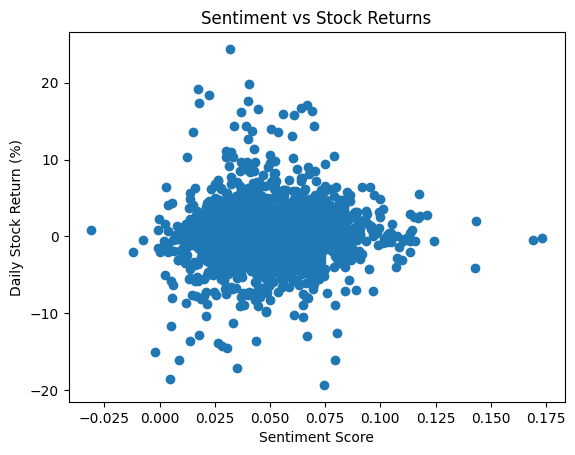

In [15]:
from scripts.newsStockCorrelation import plot_correlation

plot_correlation(mergedData)